In [34]:
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import arff
import sklearn
import sklearn.tree
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import os.path
import pandas as pd
from tensorflow.keras.models import load_model
import sklearn
import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.gaussian_process
import sklearn.neural_network
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Let us start by extracting [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) data that we have extracted
- We first extract the training data and mix all the 5 files from batches 1 - 5
- We then take care of the testing data in test_batch

In [81]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data = []
X_trn = []
y_trn = []
for i in range(1,6):
    dir = 'resources/cifar-10-batches-py/data_batch_' + str(i)
    data = unpickle(dir)
    X_trn.extend(data[b'data'])
    y_trn.extend(data[b'labels'])
    
test_data = unpickle('resources/cifar-10-batches-py/test_batch')
X_tst = test_data[b'data']
y_tst = test_data[b'labels']

# Convert the training and testing data into the right formats before feeding in to our cnn

In [87]:
X_trn = np.array(X_trn).reshape(50000,3,32,32).transpose(0,2,3,1).astype('uint8')
y_trn = np.array(y_trn)
X_tst = np.array(X_trn).reshape(50000,3,32,32).transpose(0,2,3,1).astype('uint8')
y_tst = np.array(y_tst)

# Alternatively, we can use the cifar10 datasets from tensorflow.keras


In [ ]:
#(X_trn, y_trn), (X_tst, y_tst) = datasets.cifar10.load_data()

# Verify the sizes of our data and if X.size matches y.sizes

In [9]:
print(X_trn.shape)
print((y_trn.shape))
print(X_tst.shape)
print(X_tst.shape)
y_trn = y_trn.ravel()
y_tst = y_tst.ravel()
print((y_trn.shape))
print(X_tst.shape)

(50000, 32, 32, 3)
(50000,)
(50000, 32, 32, 3)
(50000, 32, 32, 3)
(50000,)
(50000, 32, 32, 3)


# Create a function to plot some sample image to validate if our data has been extracted successfully

<Figure size 432x288 with 0 Axes>

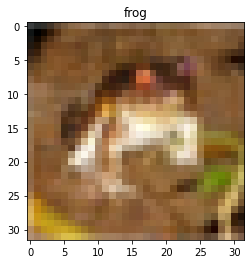

<Figure size 432x288 with 0 Axes>

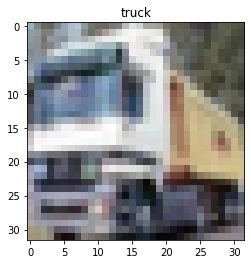

<Figure size 432x288 with 0 Axes>

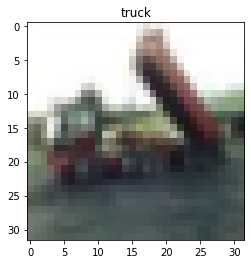

<Figure size 432x288 with 0 Axes>

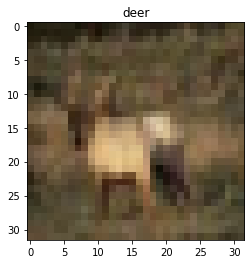

<Figure size 432x288 with 0 Axes>

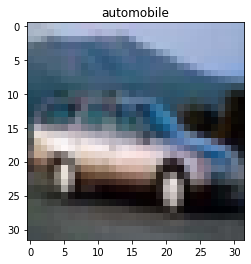

In [23]:
# the possible categories for this data
classes = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def plot_sample(X,y,index):
    plt.figure()
    plt.imshow(X[index])
    plt.title(classes[y[index]])

# Let's try to print the first 5 ndexes in the training set
for i in range(0, 5):
    plt.figure()
    plot_sample(X_trn,y_trn,i)
    

In [11]:
# Normalize the image data after finding the max
print('max in X_trn[0] is ' ,X_trn[0].max())
X_trn = X_trn / 255
X_tst = X_tst / 255

max in X_trn[0] is  255


# Let's try using 1 layer of cnn and use softmax activation to train our cnn model

In [347]:
# initialize the layers of neural network
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size = (3,3) , activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
)

In [348]:
cnn.fit(X_trn,y_trn,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5029 - accuracy: 0.4655
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2270 - accuracy: 0.5663
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1219 - accuracy: 0.6084
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0474 - accuracy: 0.6349
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9978 - accuracy: 0.6523
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9510 - accuracy: 0.6695
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9104 - accuracy: 0.6843
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8771 - accuracy: 0.6946
Epoch 9/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8373 - accuracy: 0.7091
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step - l

# At epoch 10, it reaches an accuracy of 0.7161.. It is not high enough, but let us see how accurate it is when we test it with our testing set

In [349]:
cnn.evaluate(X_tst,y_tst)

313/313 [==============================] - 1s 3ms/step - loss: 1.0872 - accuracy: 0.6326


[1.087154507637024, 0.6326000094413757]

# We now use 2 cnn layers and an epochs of 25 to try to see if we can get a better accuracy

In [350]:
# initialize the layers of neural network
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size = (3,3) , activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size = (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
           )

cnn.fit(X_trn,y_trn,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4273 - accuracy: 0.4907
Epoch 2/25
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0752 - accuracy: 0.6241
Epoch 3/25
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9472 - accuracy: 0.6727
Epoch 4/25
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8688 - accuracy: 0.6978
Epoch 5/25
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7985 - accuracy: 0.7227
Epoch 6/25
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7421 - accuracy: 0.7453
Epoch 7/25
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6940 - accuracy: 0.7582
Epoch 8/25
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6424 - accuracy: 0.7762
Epoch 9/25
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6071 - accuracy: 0.7899
Epoch 10/25
1563/1563 [==============================] - 20s 13m

# at Epoch22, we obtain an accuracy of 90+%!
- but let's see how it performs with our testing set 

In [351]:
cnn.evaluate(X_tst,y_tst)

313/313 [==============================] - 2s 5ms/step - loss: 1.7511 - accuracy: 0.6759


[1.75114107131958, 0.6758999824523926]

# However, when applying on our testing set, the accuracy is simply 67%

# let's try if we can get it pass 75%

- We will now use 3 layers of Conv2D, epoch of 30, and we implement dropout to prevent over-fitting

In [216]:
# initialize the layers of neural network
cnn3 = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size = (3,3) , padding = 'same', activation='relu', input_shape=(32,32,3)),
    layers.Dropout((0.2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size = (3,3) , padding = 'same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout((0.2)),
    layers.BatchNormalization(),
    
    
    layers.Conv2D(filters=64, kernel_size = (3,3) , padding = 'same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout((0.2)),
    layers.BatchNormalization(),
    
    
    layers.Flatten(),
    layers.Dropout((0.2)),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout((0.2)),
    layers.BatchNormalization(),
    
    
    layers.Dense(128, activation = 'relu'),
    layers.Dropout((0.2)),
    layers.BatchNormalization(),
    layers.Dense(10, activation = 'softmax')
])

#model.add(Dense(256, kernel_constraint=maxnorm(3)))

cnn3.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
           )


cnn3.fit(X_trn,y_trn,epochs=25)


Epoch 1/25
1563/1563 [==============================] - 124s 79ms/step - loss: 1.5257 - accuracy: 0.4593
Epoch 2/25
1563/1563 [==============================] - 123s 79ms/step - loss: 1.0671 - accuracy: 0.6221
Epoch 3/25
1563/1563 [==============================] - 124s 79ms/step - loss: 0.9294 - accuracy: 0.6746
Epoch 4/25
1563/1563 [==============================] - 123s 79ms/step - loss: 0.8397 - accuracy: 0.7043
Epoch 5/25
1563/1563 [==============================] - 123s 79ms/step - loss: 0.7690 - accuracy: 0.7322
Epoch 6/25
1563/1563 [==============================] - 123s 79ms/step - loss: 0.7261 - accuracy: 0.7452
Epoch 7/25
1563/1563 [==============================] - 123s 79ms/step - loss: 0.6897 - accuracy: 0.7574
Epoch 8/25
1563/1563 [==============================] - 124s 79ms/step - loss: 0.6527 - accuracy: 0.7731
Epoch 9/25
1563/1563 [==============================] - 123s 79ms/step - loss: 0.6174 - accuracy: 0.7834
Epoch 10/25
1563/1563 [==============================] 

# Let us try once again determine the accuracy with the testing set

In [226]:
cnn3.evaluate(X_tst,y_tst)

313/313 [==============================] - 5s 16ms/step - loss: 0.5865 - accuracy: 0.8037


[0.5865180492401123, 0.8036999702453613]

#  80%! We have successfully created our cnn model!

In [259]:
cnn3.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_89 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_65 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_81 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_90 (Dropout)        (None, 16, 16, 64)      

# Now that we have finished training our convolution network model with an accuracy of 80%, we can try to visualize some predictions

In [25]:
y_preds = cnn3.predict(X_tst)

In [26]:
# print the first 30 predicted y outputs
y_result = [np.argmax(element) for element in y_preds]
print('Predicted outputs')
for i in range(0,30):
    print(y_result[i], end=', ')

print()

print('Real outputs')
# print the real test output
for i in range(0,30):
    print(y_tst[i], end=', ')


Predicted outputs
3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 
Real outputs
3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 

# As we can observe from the result above, there is a slightly difference since our model has an accuracy of 80% only, but it predicts most of data accurately.

#  Saving the model

In [391]:
# save the trained cnn model with 80% accuracy
if os.path.isfile('cifar_cnn_model.h5') is False:
    cnn3.save('cifar_cnn_model.h5')

# we can now load it by calling load_model as written below------------

#new_model = load_model('cifar_cnn_model.h5')
#new_model.evaluate(X_tst,y_tst)

# Let us now train a decision tree classifier based on the CIFAR-10 data

In [31]:
# create a DecisionTreeClassifier model and set the max_depth = 10 to minimize the training time
tree_estimator = sklearn.tree.DecisionTreeClassifier(max_depth = 10)
# reshape it into 2d
X_trn2 = X_trn.reshape(-1,32*32*3)
X_tst2 = X_tst.reshape(-1,32*32*3)

In [366]:
%%time 
tree_estimator.fit(X_trn2,y_trn)

Wall time: 1min 38s


DecisionTreeClassifier(max_depth=10)

# Let's try checking the accuracy of this decision tree estimator

In [370]:
tree_estimator.score(X_tst2, y_tst)

0.3058

# Let us now plot the decision tree using sklearn.tree.plot_tree

Wall time: 190 ms


[Text(502.20000000000005, 733.86, 'X[65] <= 0.571\ngini = 0.9\nsamples = 50000\nvalue = [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000\n5000]'),
 Text(251.10000000000002, 570.78, 'X[1490] <= 0.567\ngini = 0.884\nsamples = 27222\nvalue = [1191, 2602, 3342, 3397, 3854, 3689, 4002, 2695, 1154\n1296]'),
 Text(125.55000000000001, 407.70000000000005, 'X[1585] <= 0.3\ngini = 0.875\nsamples = 20483\nvalue = [680, 1450, 2825, 2517, 3428, 2465, 3468, 2110, 628\n912]'),
 Text(62.775000000000006, 244.62, 'X[1584] <= 0.551\ngini = 0.879\nsamples = 7136\nvalue = [280, 647, 992, 889, 1116, 899, 606, 1138, 176, 393]'),
 Text(31.387500000000003, 81.54000000000008, '\n  (...)  \n'),
 Text(94.16250000000001, 81.54000000000008, '\n  (...)  \n'),
 Text(188.32500000000002, 244.62, 'X[2264] <= 0.52\ngini = 0.864\nsamples = 13347\nvalue = [400, 803, 1833, 1628, 2312, 1566, 2862, 972, 452\n519]'),
 Text(156.9375, 81.54000000000008, '\n  (...)  \n'),
 Text(219.71250000000003, 81.54000000000008, '\n  (...

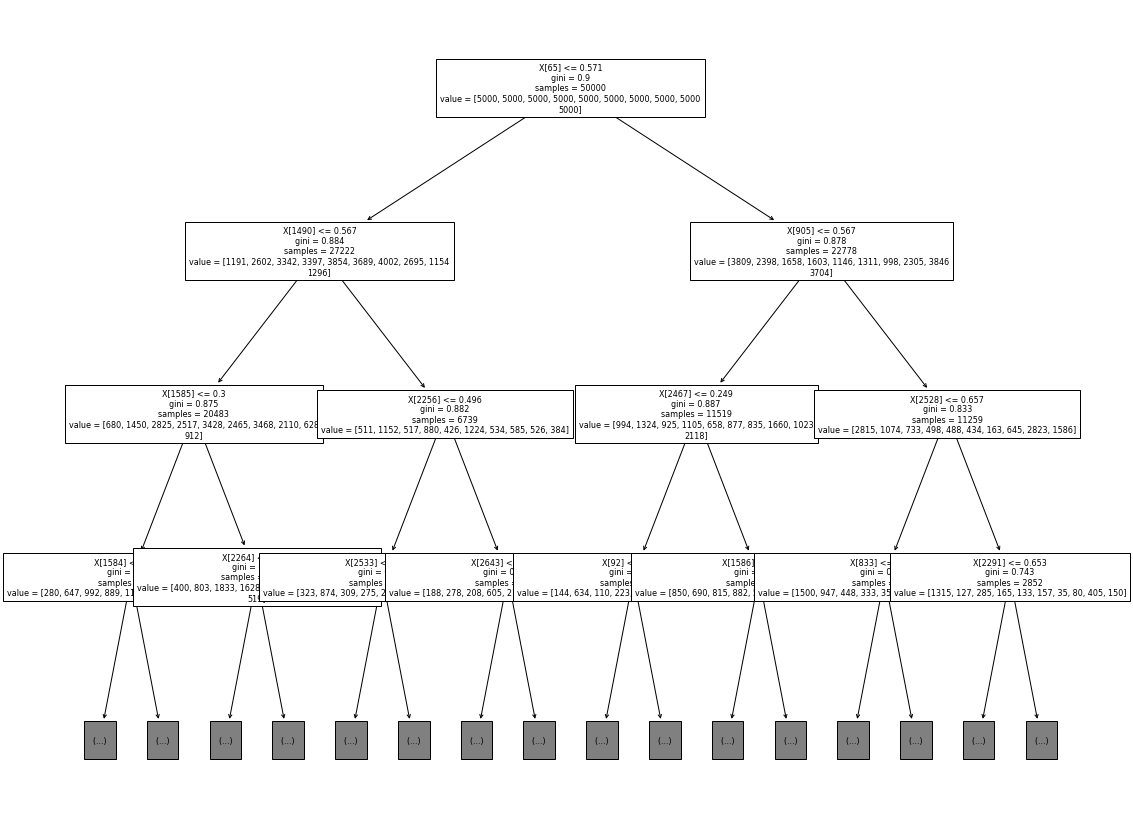

In [390]:
%%time 
plt.figure(figsize=(18,15))
sklearn.tree.plot_tree(tree_estimator, max_depth = 3, fontsize=8);

# Activation maximization for CNNs

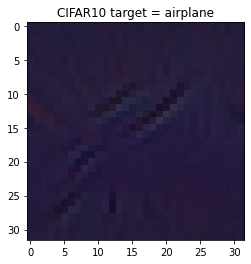

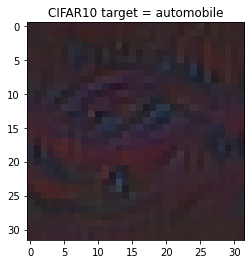

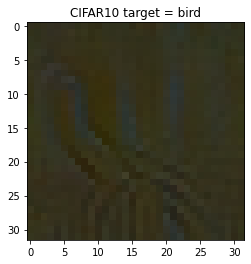

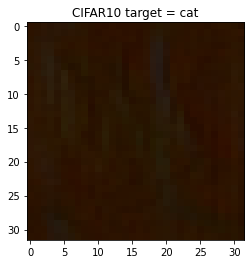

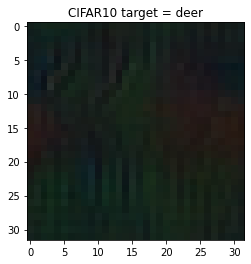

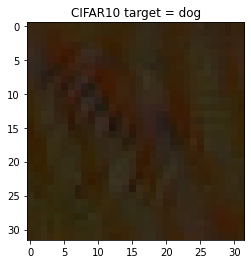

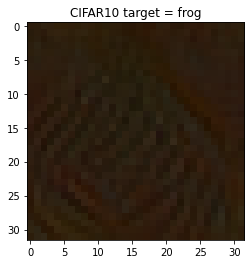

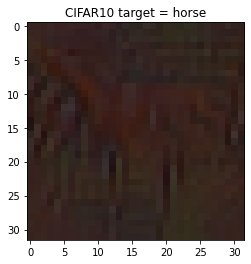

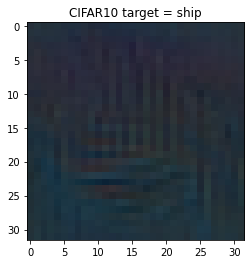

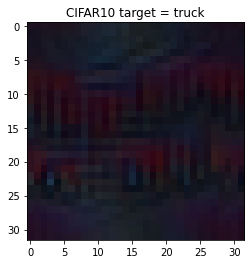

In [21]:
from keract import get_activations
from tf_keras_vis.activation_maximization import ActivationMaximization

new_model = load_model('cifar_cnn_model.h5')

# Activation Maximization code
# =============================================

def loss(output):
  return (output[0, 0], output[1, 1], output[2, 2], output[3, 3], output[4, 4], output[5, 5], output[6, 6], output[7, 7], output[8, 8], output[9, 9])

def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# Initialize Activation Maximization
visualize_activation = ActivationMaximization(new_model, model_modifier)

# Generate a random seed for each activation
seed_input = tf.random.uniform((10, 32, 32, 3), 0, 255)

# Generate activations and convert into images
activations = visualize_activation(loss, seed_input=seed_input, steps=512)
images = [activation.astype(np.float32) for activation in activations]

# Define classes
classes = {
  0: 'airplane',
  1: 'automobile',
  2: 'bird',
  3: 'cat',
  4: 'deer',
  5: 'dog',
  6: 'frog',
  7: 'horse',
  8: 'ship',
  9: 'truck'
}

# Visualize each image
for i in range(0, len(images)):
  visualization = images[i]
  plt.imshow(visualization.astype('uint8'))
  plt.title(f'CIFAR10 target = {classes[i]}')
  plt.show()


# 4. Novelty component

- For the novelty component, I will like to train the emoji data taken from the assignment with convolution neural network
- to observe whether the accuracy can be bigger than using random forest classifier with a test-set performance of 73%


# Let us define some functions that will be useful in processing emoji data

In [96]:
def download(remoteurl: str, localfile: str):
    """
    Download remoteurl to localfile, unless localfile already exists.
    Returns the localfile string.
    """
    if not os.path.exists(localfile):
        print("Downloading %s..." % localfile)
        filename, headers = urllib.request.urlretrieve(remoteurl, localfile)
    return localfile

def rgba_to_rgb(image):
    """
    Converts image from RGBA format (H,W,4) to RGB format (H,W,3).
    Returns the new RGB image.
    """
    assert image.ndim == 3, "Expected 3-dimensional array"
    assert image.shape[2] == 4, "Expected 4 colour channels"
    assert image.max() <= 1, "Expected color values in range [0,1]"
    rgb, a = np.split(image, [3], axis=2)  # Split into (H,W,3) and (H,W,1)
    return a*rgb + (1-a)                   # Apply alpha blending to get RGB

def findEmojiName(x,y):
    for i in range(0, len(data)):
        if data[i]['sheet_x'] == x and data[i]['sheet_y'] == y:
            return data[i]['short_name']


# Download the emoji data 

In [97]:
import urllib                    # for downloading remote files 
import json
# Your code here. Use as many lines as you need.
# Feel free to define global variables like EMOJI_SIZE=16 for later use.
resources_dir = "resources"
EMOJI_SIZE = 16
vendors = ['apple', 'facebook', 'google', 'twitter']
size = 16
imageFileNames = []
if not os.path.exists(resources_dir):
    os.mkdir(resources_dir) 
download("https://github.com/iamcal/emoji-data/raw/master/emoji.json" , "resources/emojis.json")

for vendor in vendors:
    toDownload = 'sheet_' + vendor + '_' + str(size) + '_clean.png'
    imageFileNames.append("resources/"+toDownload)
    download(("https://github.com/iamcal/emoji-data/raw/master/sheets-clean/" + toDownload), 'resources/' +toDownload)

# Load the emojis.json to get all the data about emojis such as x,y position, category name...etc

In [134]:
# Your answer here. Aim for 2-4 lines.
# Keep the metadata in a global variable that you can keep referring to.
f = open('resources/emojis.json',)
data = json.load(f)
f.close()

# Define get_emoji_image() to visualize the emoji data based on index

(16, 16, 4)


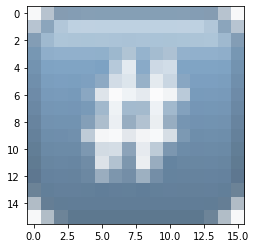

In [99]:
emojiImageData = [plt.imread(fname) for fname in imageFileNames]
def get_emoji_image(style_index, emoji_index):
    """
    Given a vendor style index (apple=0,facebook=1,google=2,twitter=3)
    and an emoji index, returns the 16x16 RGBA image as a Numpy array
    with shape (16,16,4).
    """
    # Your implementation here. Aim for 5-8 lines (not including comments).
    # the index x and y to start extracting emoji is at (1,1), so we have to include it in x and y axis by doing +1
    # each emoji has a space of 2 units, so we have to do 2 x emoji_index in order to find the right position of emoji
    x_init = 1+16*emoji_index[0] + 2*emoji_index[0]
    x_end = x_init + 16
    # the length of an emoji is 16, so mark the end of emoji position at x_init+16
    y_init = 1+16*emoji_index[1] + 2*emoji_index[1]
    y_end = y_init + 16
    img_ar = emojiImageData[style_index][y_init:y_end,x_init:x_end]
    print(img_ar.shape)
    return img_ar

plt.imshow(get_emoji_image(0,(0,0)));

# Initialize the X,y data before splitting into training and testing

In [133]:
emojiIndexes = [] #store all possitble (x,y) tuple into a list to get the emoji based on the x,y index
categories = []  #store each corresponding category into a list to initialize them into y in the next questions
categories_lis = ['Symbols', 'Activities','Flags','Travel & Places','Food & Drink','Animals & Nature',
                  'People & Body','Objects', 'Component', 'Smileys & Emotion'
                 ]
#names = []
for index in data:
    x_pos = index['sheet_x']   #parse the sheet_x to find x index
    y_pos = index['sheet_y']   #parse the sheet_y to find y index
    emojiIndexes.append((x_pos,y_pos))
    categories.append(index['category'])   #parse the category to find category of the corresponding location
    #names.append(index['name'])
X_list = []
for emojiIndex in range(0,len(emojiIndexes)): 
    for style_index in range(0,4):                 #there are 4 styles of emojis that we have to take into account
        # get the images with get_emoji_image method for every single emoji image and convert them to rgba
        rgba_emoji = rgba_to_rgb(get_emoji_image(style_index,emojiIndexes[emojiIndex]))
        # append the rbga data of each image into X_list to then convert it to numpy array
        X_list.append(rgba_emoji)
X = np.array(X_list)   #convert the X_list into a np array and assign it as our X dataset
X = X.reshape(-1,16*16*3) #shape it into 2 dimensions to train later on

y = []
for c in categories:
    for x in range(0,4):  #since the category for each style (apple,twitter...etc) are all the same,
        y.append(categories_lis.index(c))      # so append them into list 4 times
y = np.array(y)         #convert y into numpy array

(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16,

(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16,

(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16,

(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16,

(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16, 16, 4)
(16,

# Splitting 80% of the data for training and 20% for testing
# Also reshape the training data into the (-1,16,16,3) format before training it with cnn

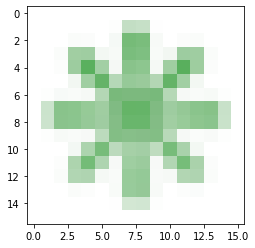

In [135]:
X_trn_emoji, X_tst_emoji, y_trn_emoji, y_tst_emoji = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
plt.imshow(X_val_emoji.reshape(-1,16,16,3)[0])

X_trn_emoji = X_trn_emoji.reshape(-1,16,16,3)
X_tst_emoji = X_tst_emoji.reshape(-1,16,16,3)

# Using the exact same convolution neural network model to train  

In [ ]:
cnn_emoji = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size = (3,3) , padding = 'same', activation='relu', input_shape=(16,16,3)),
    layers.Dropout((0.2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size = (3,3) , padding = 'same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout((0.2)),
    layers.BatchNormalization(),
    
    
    layers.Conv2D(filters=64, kernel_size = (3,3) , padding = 'same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout((0.2)),
    layers.BatchNormalization(),
    
    
    layers.Flatten(),
    layers.Dropout((0.2)),
    layers.Dense(256, activation = 'relu'),
    layers.Dropout((0.2)),
    layers.BatchNormalization(),
    
    
    layers.Dense(128, activation = 'relu'),
    layers.Dropout((0.2)),
    layers.BatchNormalization(),
    layers.Dense(10, activation = 'softmax')
])


cnn_emoji.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
           )

Fitting the data

In [137]:
%%time
cnn_emoji.fit(X_trn_emoji,y_trn_emoji,epochs=25)

Epoch 1/25
182/182 [==============================] - 5s 23ms/step - loss: 1.8832 - accuracy: 0.4125
Epoch 2/25
182/182 [==============================] - 4s 23ms/step - loss: 1.4641 - accuracy: 0.5191
Epoch 3/25
182/182 [==============================] - 4s 24ms/step - loss: 1.3418 - accuracy: 0.5569
Epoch 4/25
182/182 [==============================] - 4s 23ms/step - loss: 1.2454 - accuracy: 0.5862
Epoch 5/25
182/182 [==============================] - 4s 22ms/step - loss: 1.1875 - accuracy: 0.6072
Epoch 6/25
182/182 [==============================] - 4s 22ms/step - loss: 1.1385 - accuracy: 0.6194
Epoch 7/25
182/182 [==============================] - 4s 22ms/step - loss: 1.0961 - accuracy: 0.6366
Epoch 8/25
182/182 [==============================] - 4s 23ms/step - loss: 1.0556 - accuracy: 0.6483
Epoch 9/25
182/182 [==============================] - 4s 23ms/step - loss: 1.0215 - accuracy: 0.6574
Epoch 10/25
182/182 [==============================] - 4s 22ms/step - loss: 0.9779 - accura

In [151]:
cnn_emoji.evaluate(X_tst_emoji,y_tst_emoji)

46/46 [==============================] - 0s 6ms/step - loss: 0.7169 - accuracy: 0.7586


[0.7168533802032471, 0.7585969567298889]

# The result is 75.86%! This is bigger than the random forest classifier with 73% accuracy

By tuning the model, I am certain that the accuracy can increase to 80%+, but I really don't have time anymore.

In [148]:
if os.path.isfile('emoji_model.h5') is False:
    cnn_emoji.save('emoji_model.h5')

# Activation maximization for CNNs

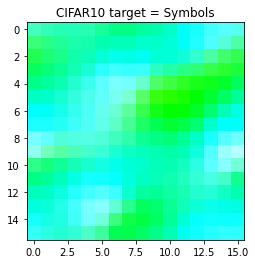

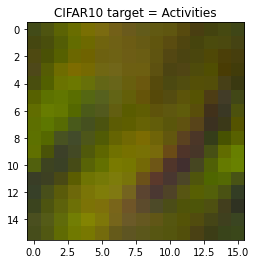

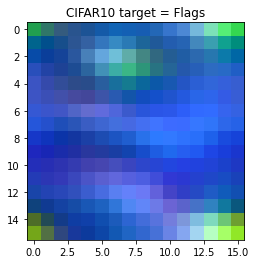

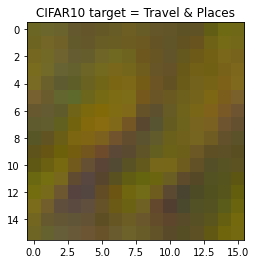

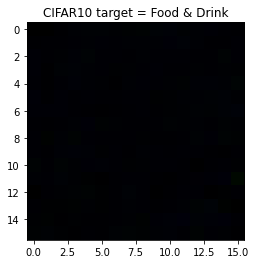

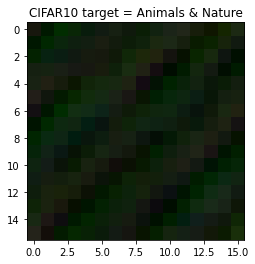

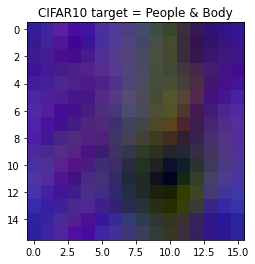

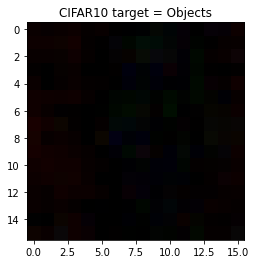

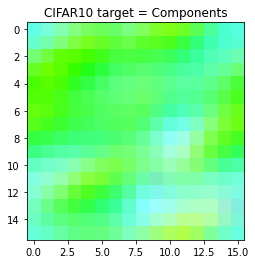

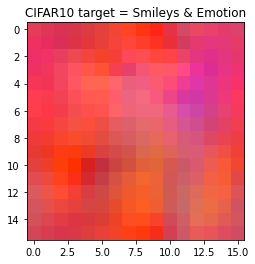

In [150]:
new_model_emoji = load_model('emoji_model.h5')

# Activation Maximization code
# =============================================

def loss(output):
  return (output[0, 0], output[1, 1], output[2, 2], output[3, 3], output[4, 4], output[5, 5], output[6, 6], output[7, 7], output[8, 8], output[9, 9])

def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# Initialize Activation Maximization
visualize_activation = ActivationMaximization(new_model_emoji, model_modifier)

# Generate a random seed for each activation
seed_input = tf.random.uniform((10, 16,16,3), 0, 255)

# Generate activations and convert into images
activations = visualize_activation(loss, seed_input=seed_input, steps=512)
images = [activation.astype(np.float32) for activation in activations]

# Define classes
classes = {
  0: 'Symbols',
  1: 'Activities',
  2: 'Flags',
  3: 'Travel & Places',
  4: 'Food & Drink',
  5: 'Animals & Nature',
  6: 'People & Body',
  7: 'Objects',
  8: 'Components',
  9: 'Smileys & Emotion'
}
                 
# Visualize each image
for i in range(0, len(images)):
  visualization = images[i]
  plt.imshow(visualization.astype('uint8'))
  plt.title(f'CIFAR10 target = {classes[i]}')
  plt.show()
